<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/generativeAI/MLPNS23_autoencoder_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential  
from keras import optimizers
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
#import glob
import pylab as pl
from PIL import Image

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# 1. change kernel to GPU 
go to runtime -> change runtime type -> GPU

# digits first

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

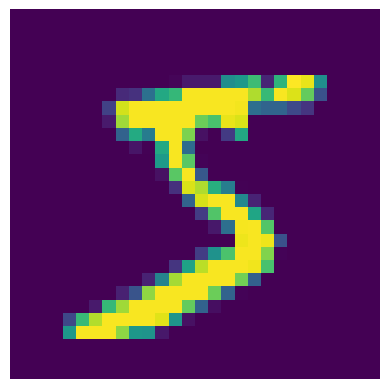

In [ ]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_train.shape

In [ ]:
x_train.dtype, x_train.max(), x_train.min()


(dtype('uint8'), 255, 0)

In [ ]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
xshape = x_train.shape[1]

# create a model

In [ ]:
keras.models?

In [ ]:
model_digits64 = Sequential()
## encoder
model_digits64.add(Dense(256, activation='relu', input_dim=xshape))
# input layer and the output size
model_digits64.add(Dense(128, activation='relu', input_dim=xshape))
#compression layer
model_digits64.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))

In [ ]:
model_digits64 = Sequential()
## encoder
# input layer and the output size
model_digits64.add(Dense(128, activation='relu', input_dim=xshape))
#compression layer
model_digits64.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))


#alternative syntax
"""
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
"""

'\nencoded = Dense(encoding_dim, activation=\'relu\')(input_img)\n# "decoded" is the lossy reconstruction of the input\ndecoded = Dense(784, activation=\'sigmoid\')(encoded)\n\nautoencoder = Model(input_img, decoded)\n\nencoder = Model(input_img, encoded)\n\n# create a placeholder for an encoded (32-dimensional) input\nencoded_input = Input(shape=(encoding_dim,))\n# retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# create the decoder model\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\n'

## losses and activation functions

### regression
- loss='mean_squared_error' L2: default loss to use for regression problems. => linear activation function in output layer, one node out

alternatives:  loss='mean_squared_logarithmic_error', 'mean_absolute_error' (which is L1 instead of L2)
### binary classification

- loss='binary_crossentropy' => sigmoid activation function in output layer, one node out

alternatives: 'hinge'

### multiclass classification
categorical encoded as numerical
- loss='categorical_crossentropy' => softmax n nodes out

onehot encoded categoridal
- 'parse_categorical_crossentropy' => softmax n nodes out

- 'kullback Leibler Divergence Loss' => probabilistic categorical classification; log(P/Q)

## optimizers
- SGD: stocastic gradient descent 
    - nesterov=True -> momentum inclusion
- adam: Adaptive moment estimation. **good in most cases**
- adagrad: different steps for different parameters based on frequency (binary input) well-suited for dealing with sparse data.

- adaDelta: like adagrad but compensated for vanishing learning rate problem

momentum refers to looking one step back and make a decision that includes the slope there



## learning Rate:
generally you need to adjust the learning rate which is how much you change the parameters by at each step. 
keras.optimizers.Adam(lr=0.001)


https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif

In [ ]:
# choose the optimizer and loss appropriately!
model_digits64.compile(optimizer="adadelta", loss="mean_squared_error")

In [ ]:
print(model_digits64.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 8s 3ms/step - loss: 0.1172 - val_loss: 0.1185
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1161 - val_loss: 0.1175
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1152 - val_loss: 0.1167
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1144 - val_loss: 0.1160
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1138 - val_loss: 0.1154
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1132 - val_loss: 0.1148
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1127 - val_loss: 0.1143
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1122 - val_loss: 0.1139
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1118 - val_loss: 0.1134
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1113 - val_loss: 0.1130

# always look at the loss!

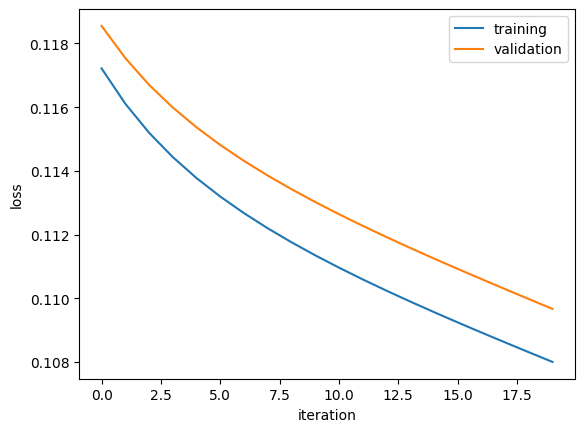

In [ ]:

pl.plot(np.array(history64.history['loss']), label="training")
pl.plot(np.array(history64.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

# predict

In [ ]:
output_image64 = model_digits64.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


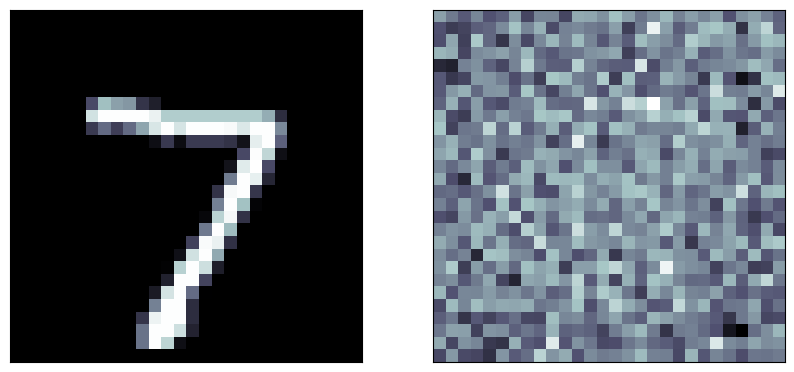

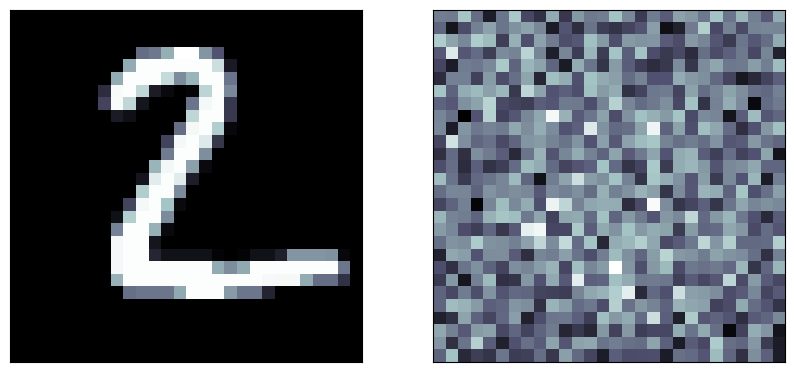

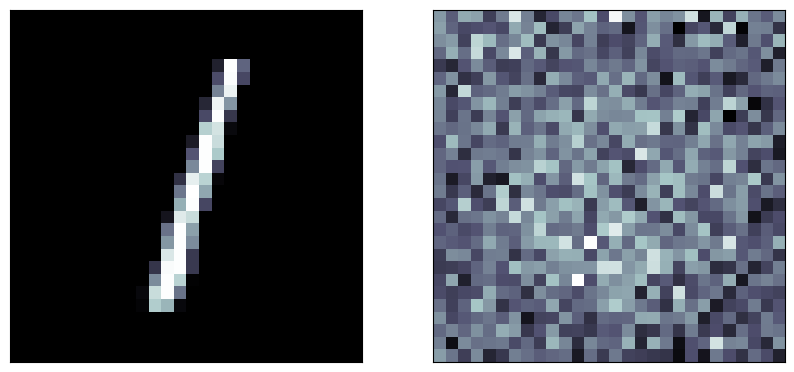

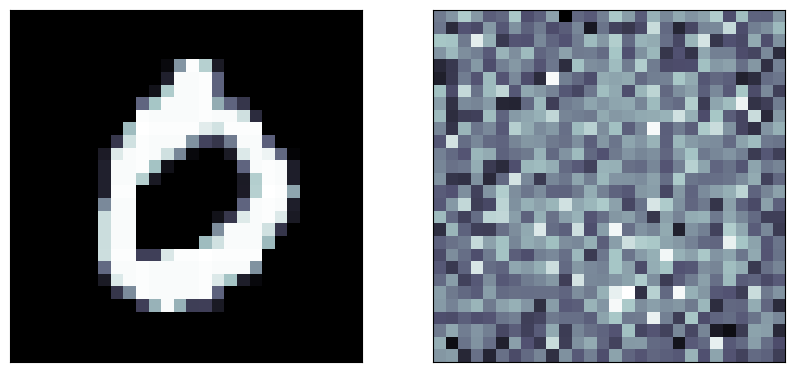

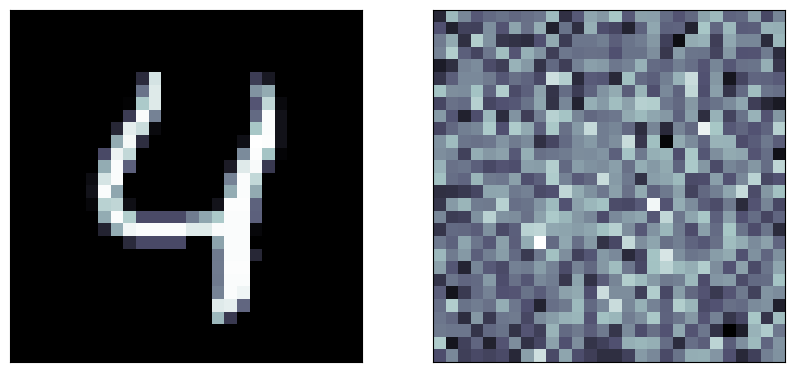

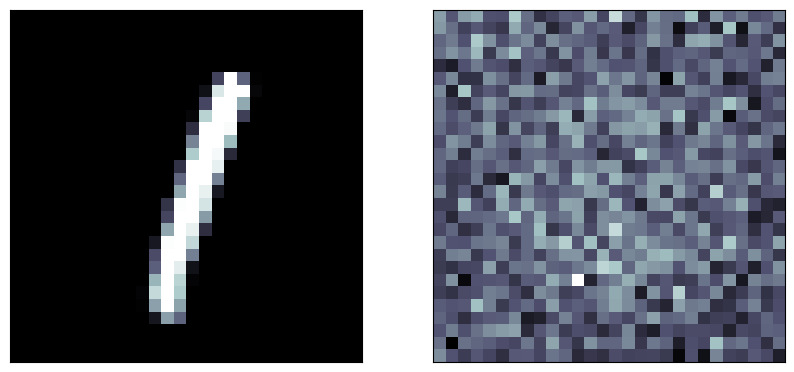

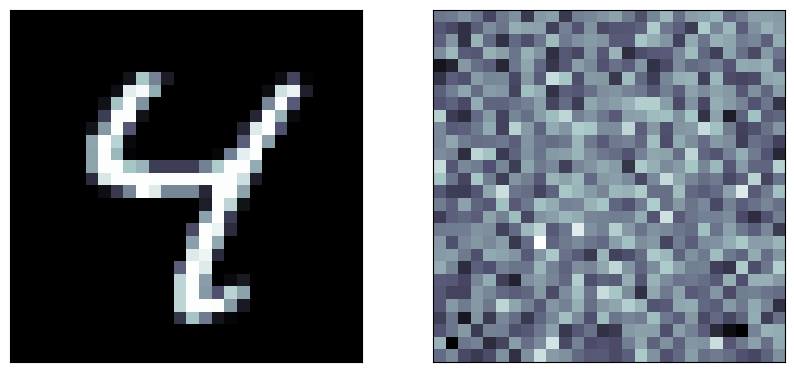

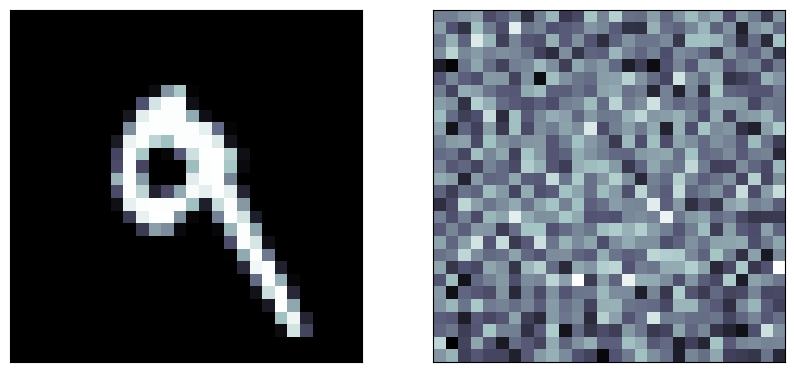

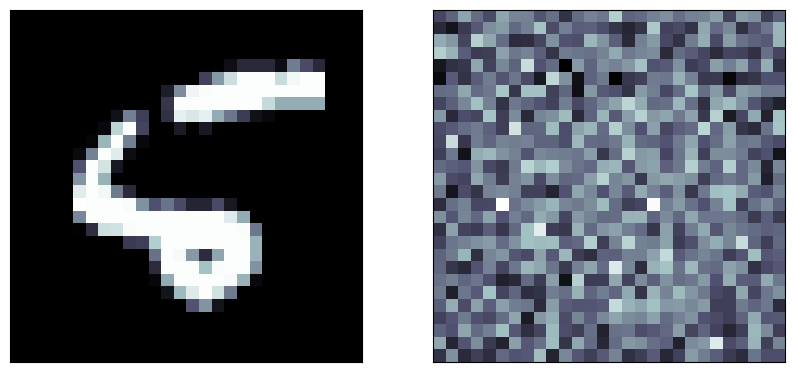

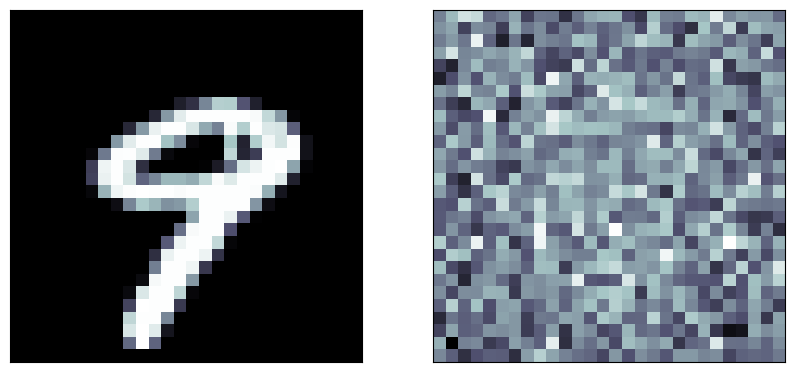

In [ ]:
for i in range(10):
  compareinout(i, output_image64, x_test)

This is a rather bad result. Let me see if I can improve it . The images are too detailed. I can treat the problem as a binary problem to derice some detail. To approach a binary classifier I switch the activation function in the last layer to sigmoid

# train training longer

In [ ]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=40, batch_size=100, verbose=1)

Epoch 1/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1077 - val_loss: 0.1094
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1074 - val_loss: 0.1090
Epoch 3/40
600/600 [==============================] - 2s 4ms/step - loss: 0.1071 - val_loss: 0.1087
Epoch 4/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1068 - val_loss: 0.1084
Epoch 5/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1065 - val_loss: 0.1081
Epoch 6/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1062 - val_loss: 0.1078
Epoch 7/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1059 - val_loss: 0.1075
Epoch 8/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1056 - val_loss: 0.1072
Epoch 9/40
600/600 [==============================] - 2s 4ms/step - loss: 0.1053 - val_loss: 0.1068
Epoch 10/40
600/600 [==============================] - 2s 4ms/step - loss: 0.1049 - val_loss: 0.1065

## earlystopping call back

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs.
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=80, batch_size=100, 
                               verbose=1, callbacks=[callback])


Epoch 1/80
600/600 [==============================] - 2s 4ms/step - loss: 0.0919 - val_loss: 0.0929
Epoch 2/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0914 - val_loss: 0.0923
Epoch 3/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0908 - val_loss: 0.0918
Epoch 4/80
600/600 [==============================] - 3s 4ms/step - loss: 0.0903 - val_loss: 0.0912
Epoch 5/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0897 - val_loss: 0.0906
Epoch 6/80
600/600 [==============================] - 3s 4ms/step - loss: 0.0892 - val_loss: 0.0900
Epoch 7/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0886 - val_loss: 0.0895
Epoch 8/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0880 - val_loss: 0.0889
Epoch 9/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0875 - val_loss: 0.0883
Epoch 10/80
600/600 [==============================] - 3s 4ms/step - loss: 0.0869 - val_loss: 0.0877

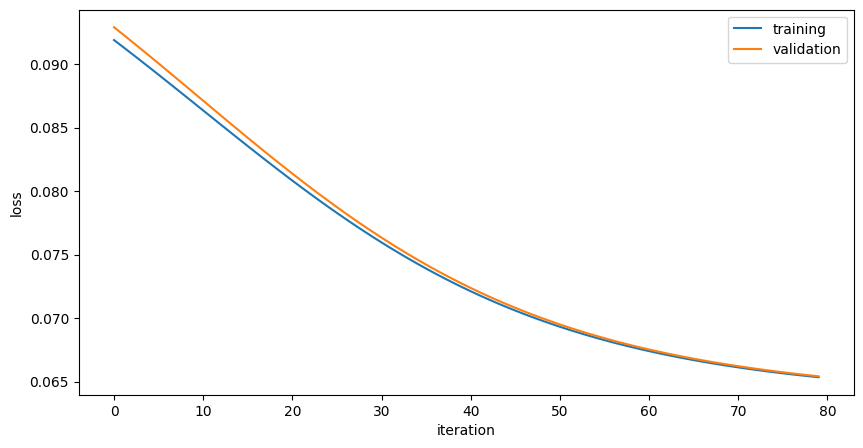

In [ ]:
pl.plot(np.array(history64.history['loss']), label="training")
pl.plot(np.array(history64.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

313/313 [==============================] - 1s 2ms/step


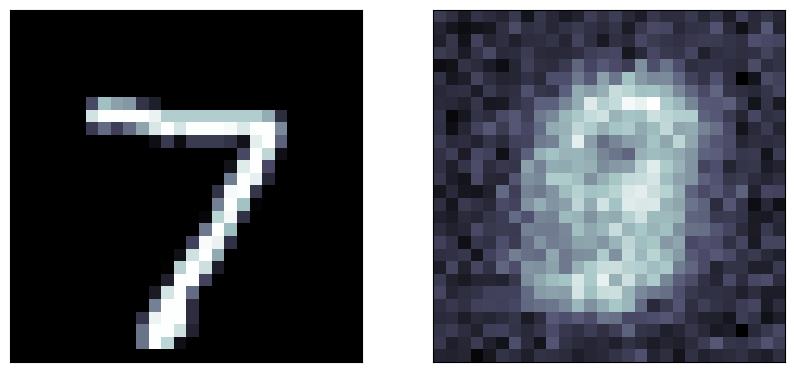

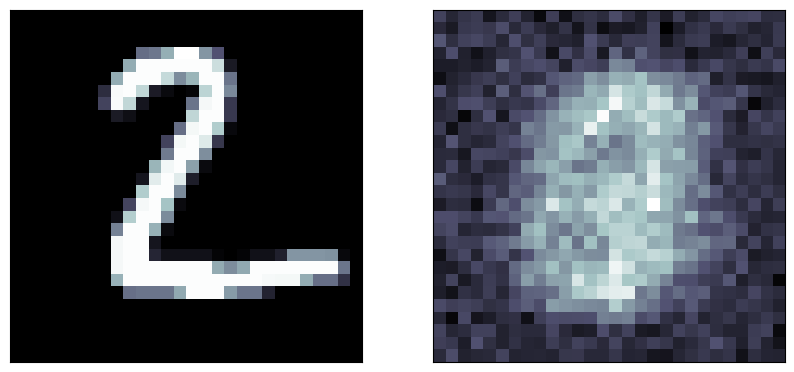

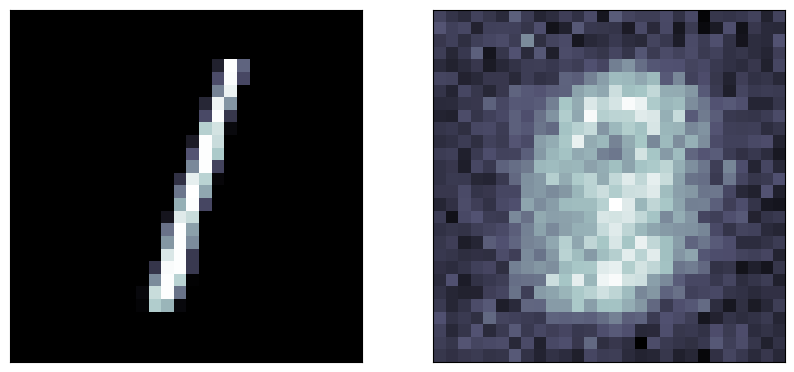

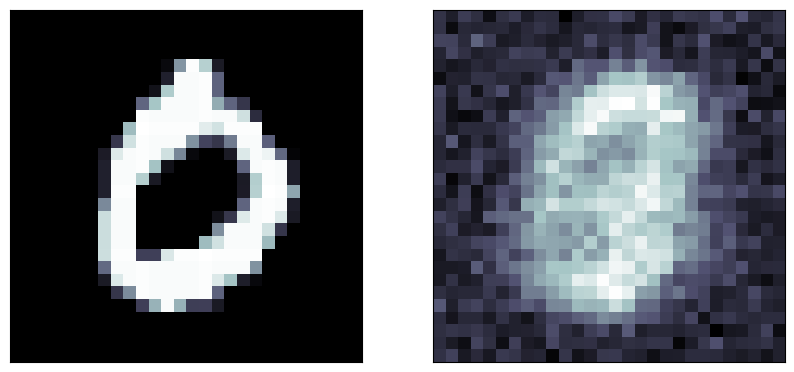

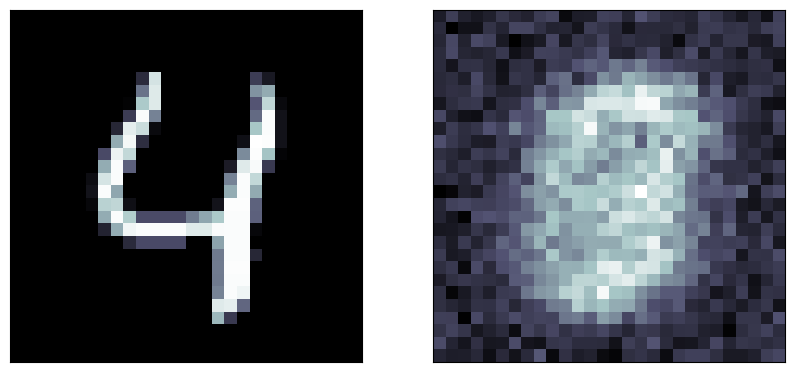

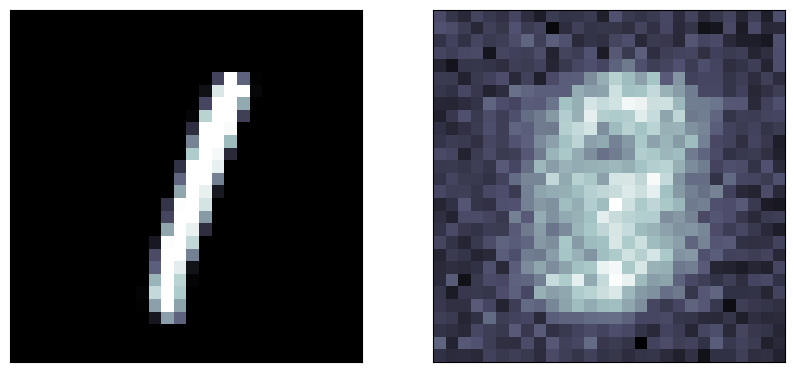

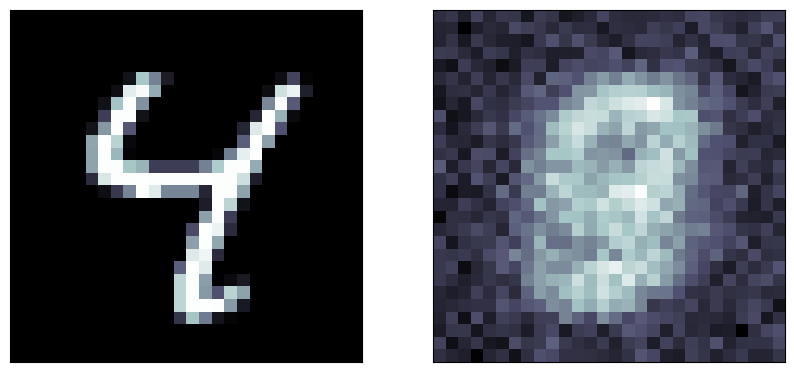

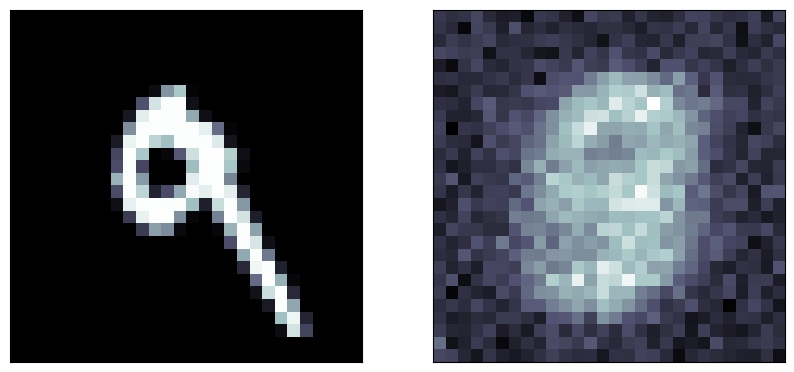

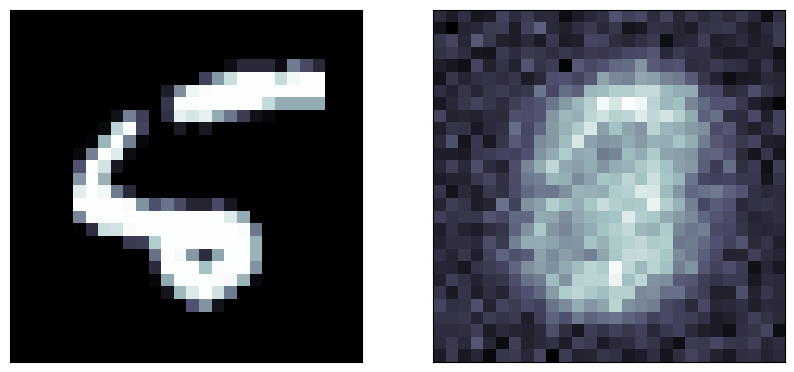

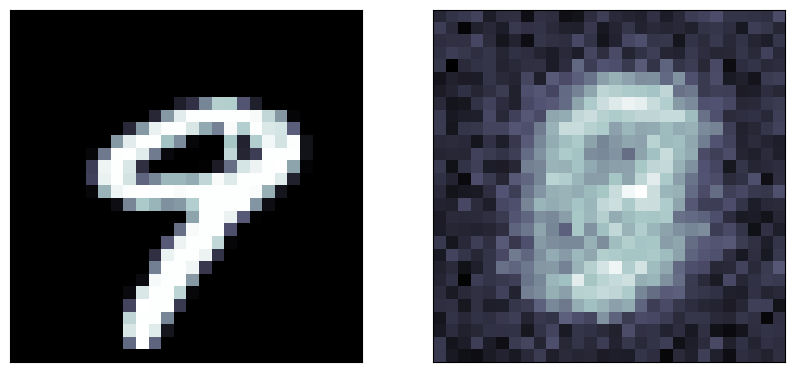

In [ ]:
output_image64 = model_digits64.predict(x_test)
for i in range(10):
  compareinout(i, output_image64, x_test)

## posterior collapse: the autoencoder learned the average of the data

# change the learning rate

In [ ]:
from tensorflow import keras
from keras import optimizers
opt = keras.optimizers.Adam(learning_rate=0.01)
model_digits64.compile(loss="mean_squared_error", optimizer=opt)
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 3s 3ms/step - loss: 0.0272 - val_loss: 0.0205
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0195 - val_loss: 0.0186
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0184 - val_loss: 0.0175
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0175 - val_loss: 0.0176
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0170 - val_loss: 0.0164
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0166 - val_loss: 0.0161
Epoch 8/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0165 - val_loss: 0.0158
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0164 - val_loss: 0.0161
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0162 - val_loss: 0.0163

313/313 [==============================] - 1s 2ms/step


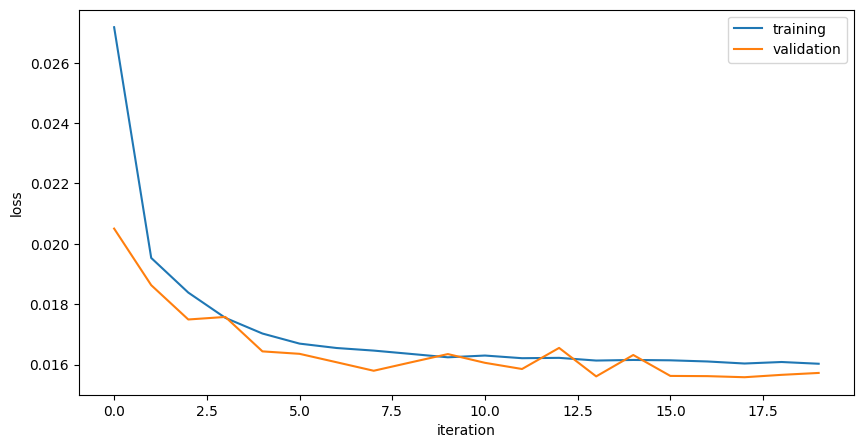

In [ ]:
output_image64 = model_digits64.predict(x_test)
pl.plot(np.array(history64.history['loss']), label="training")
pl.plot(np.array(history64.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()

#pl.yscale('log')
#pl.xscale('log')

A noisier loss function is not a bad sign! the model is overall learning - decreasing the learning rate would give a smoother loss

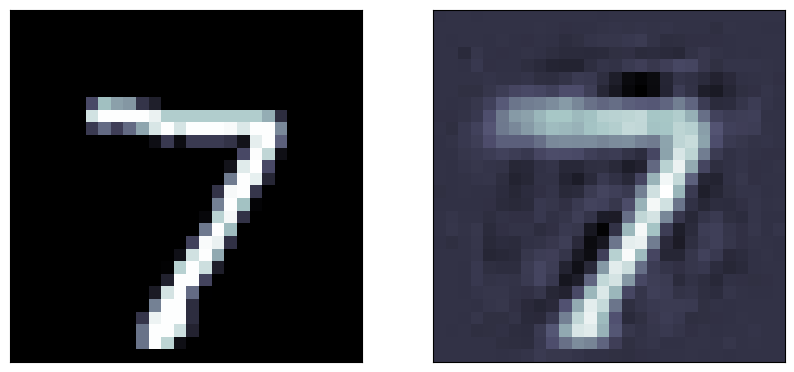

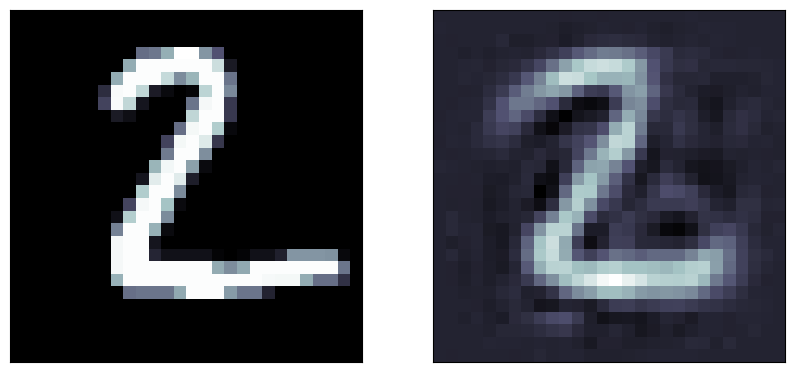

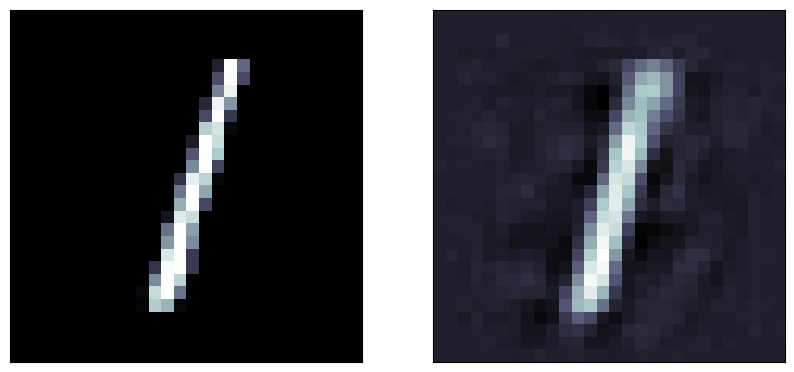

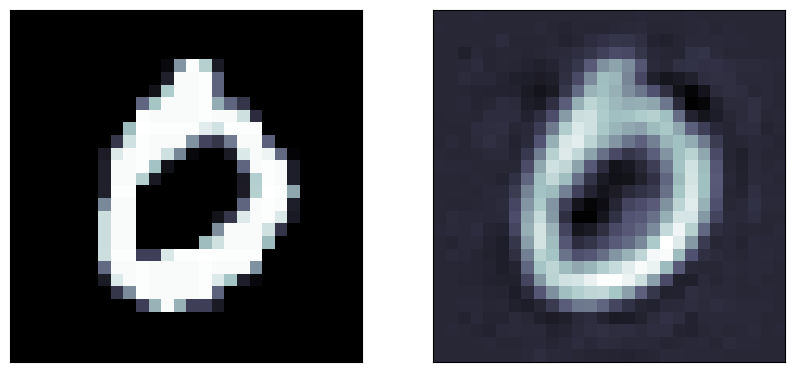

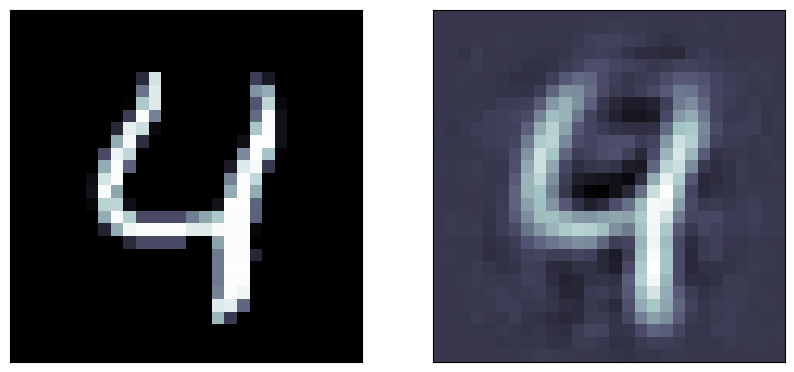

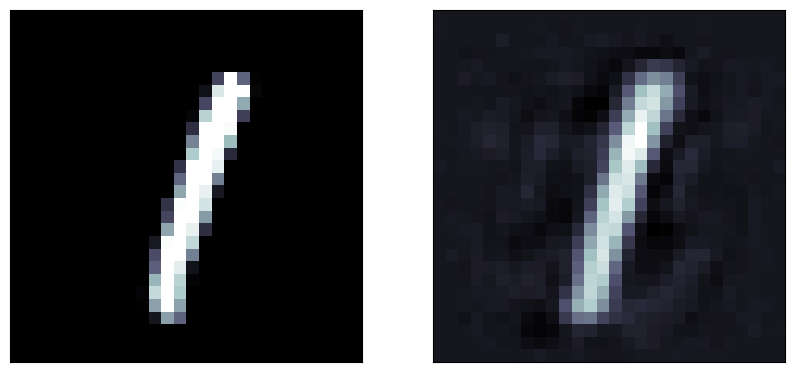

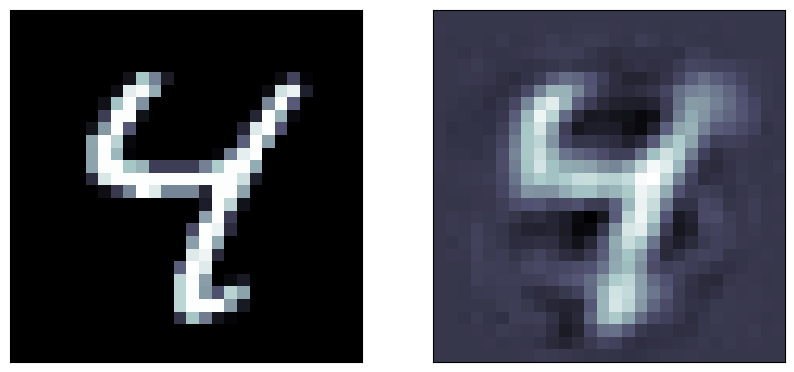

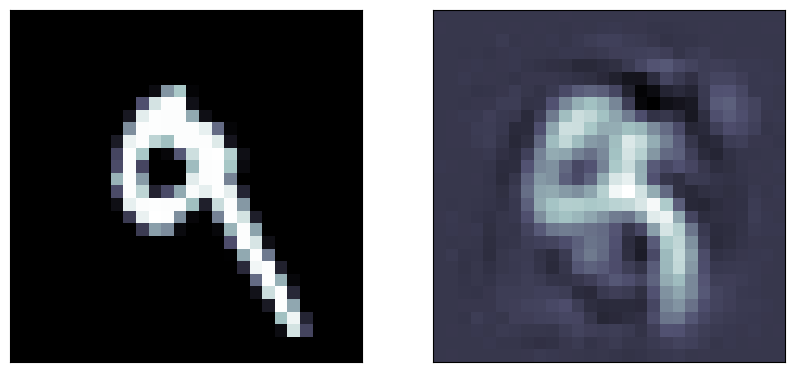

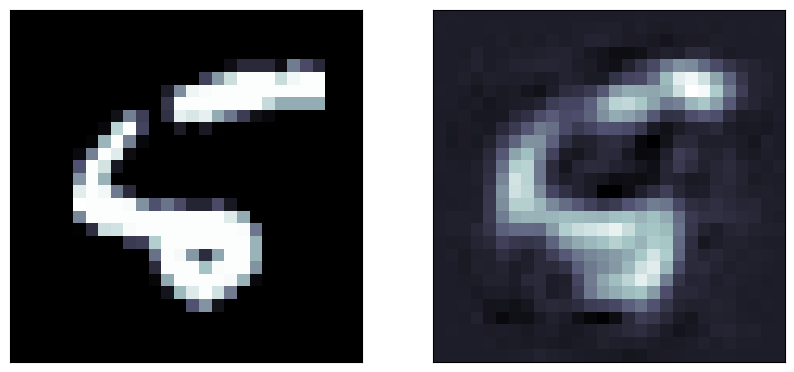

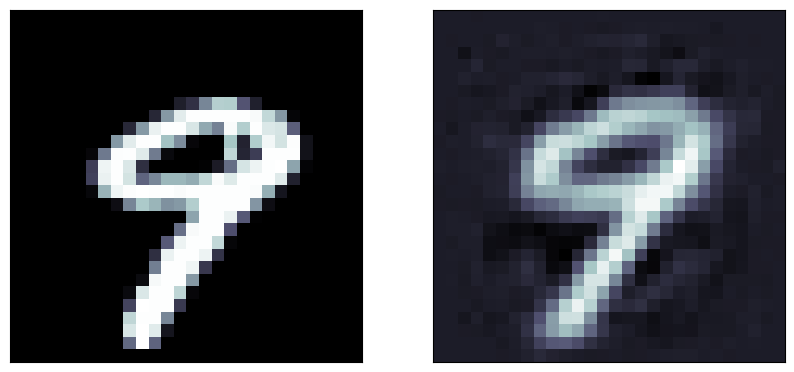

In [ ]:
for i in range(10):
  compareinout(i, output_image64, x_test)

# change activation function on the last layer

In [ ]:
model_digits64_sig = Sequential()
## encoder
# input layer and the output size
model_digits64_sig.add(Dense(128, activation='relu', input_dim=xshape))
#compression layer
model_digits64_sig.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64_sig.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64_sig.add(Dense(ndim, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model_digits64_sig.compile(loss="mean_squared_error", optimizer=opt)
history64_sig = model_digits64_sig.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=40, batch_size=100, verbose=1,
                               callbacks=[callback])


Epoch 1/40
600/600 [==============================] - 4s 4ms/step - loss: 0.0362 - val_loss: 0.0169
Epoch 2/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0141 - val_loss: 0.0115
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 4/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 5/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0082 - val_loss: 0.0075
Epoch 6/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 7/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 8/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 9/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 10/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0060 - val_loss: 0.0057

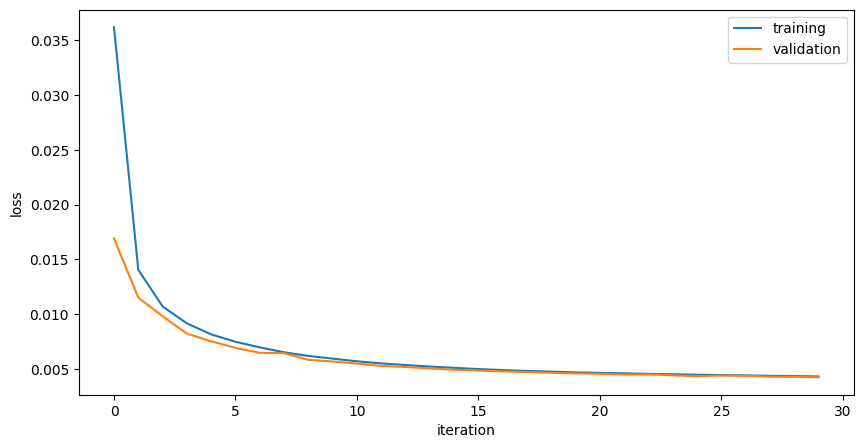

In [ ]:
pl.plot(np.array(history64_sig.history['loss']), label="training")
pl.plot(np.array(history64_sig.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

The loss function got quite flat. This model has converged (or nearly so)

313/313 [==============================] - 2s 5ms/step


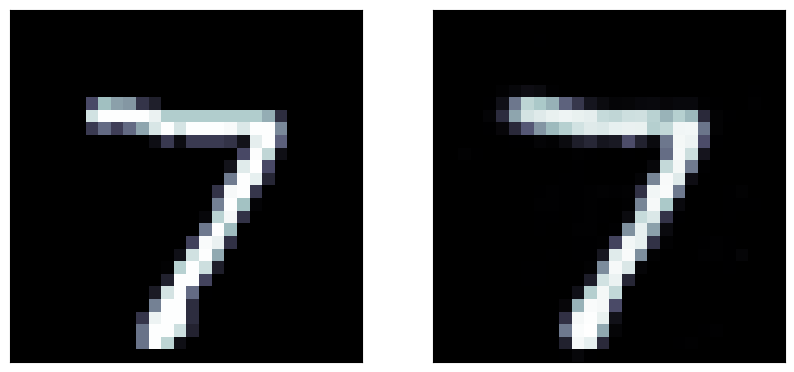

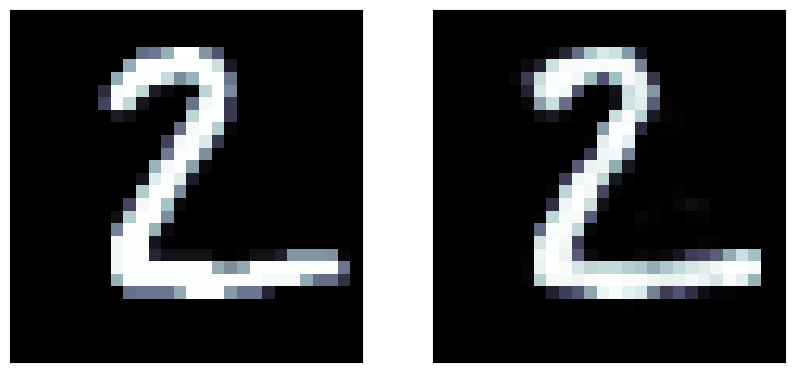

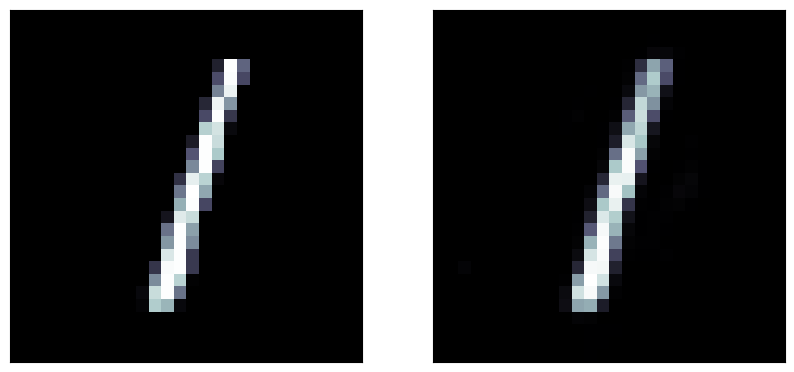

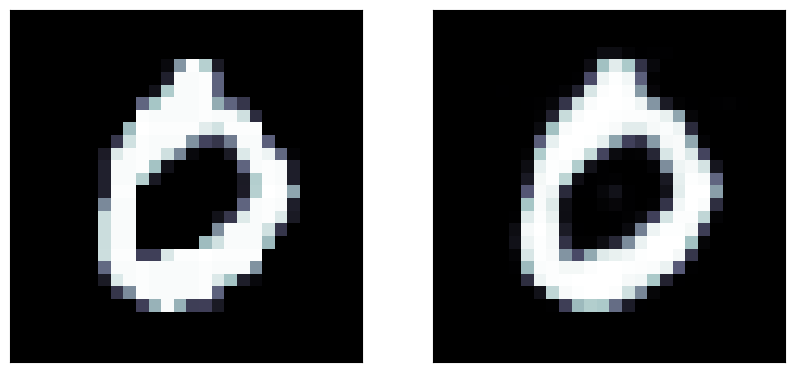

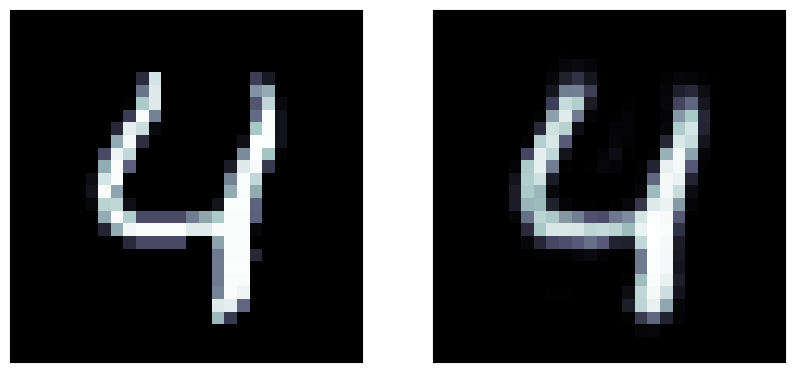

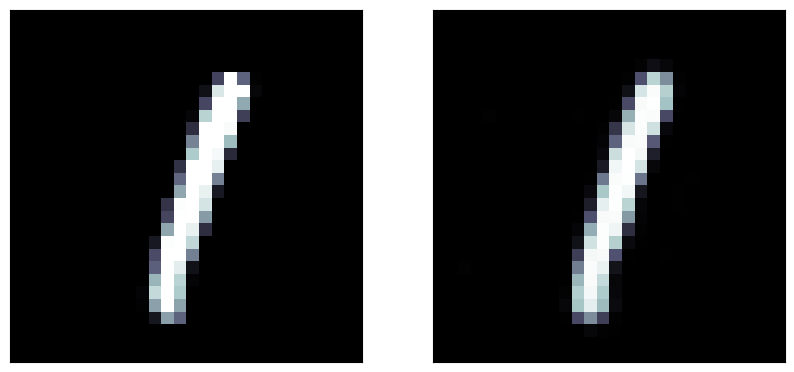

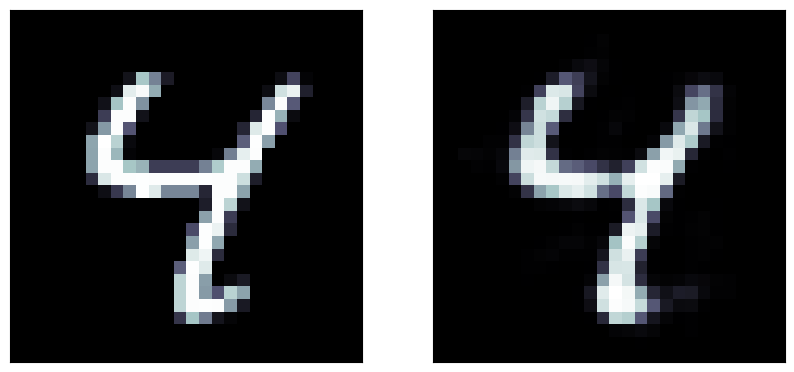

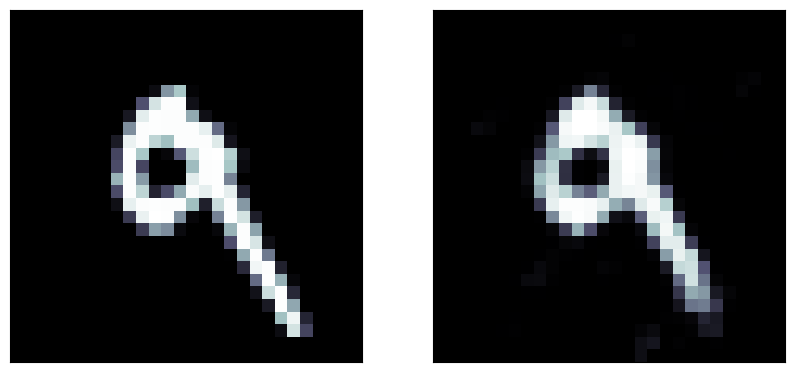

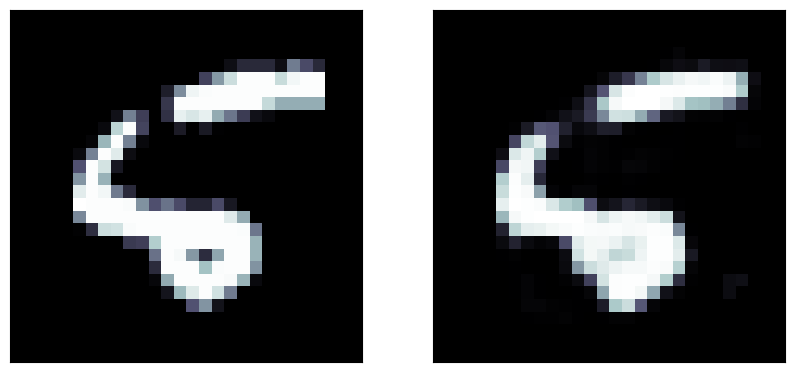

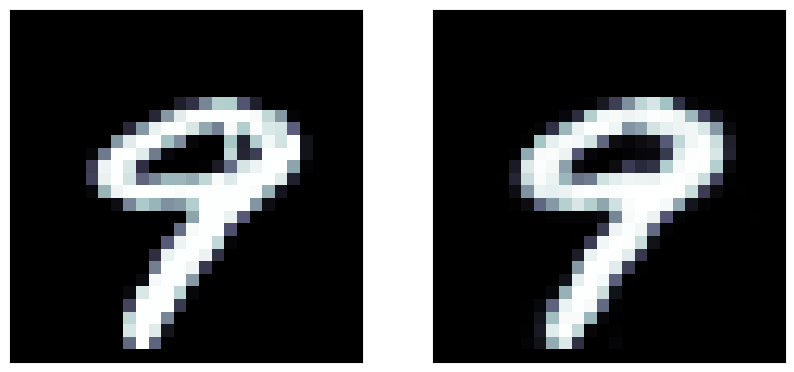

In [ ]:

output_image64_sig = model_digits64_sig.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_sig, x_test)

Much better! Let me choose a loss fuction that is more appropriate for a binary classificaton - this is not a binary task but the gradient in the data is significant.

In [ ]:
# sigmoid and binary cross entropy loss
model_digits64_bce = model_digits64_sig

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.1)
model_digits64_bce.compile(optimizer=opt, loss="binary_crossentropy")
history64_bce = model_digits64_bce.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=20, batch_size=100, verbose=1, 
                                       callbacks=[callback])


Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.0749 - val_loss: 0.0743
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0747 - val_loss: 0.0742
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0746 - val_loss: 0.0741
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0745 - val_loss: 0.0741
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0745 - val_loss: 0.0741
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0745 - val_loss: 0.0740
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0744 - val_loss: 0.0740
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0744 - val_loss: 0.0740
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0744 - val_loss: 0.0740
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0743 - val_loss: 0.0739

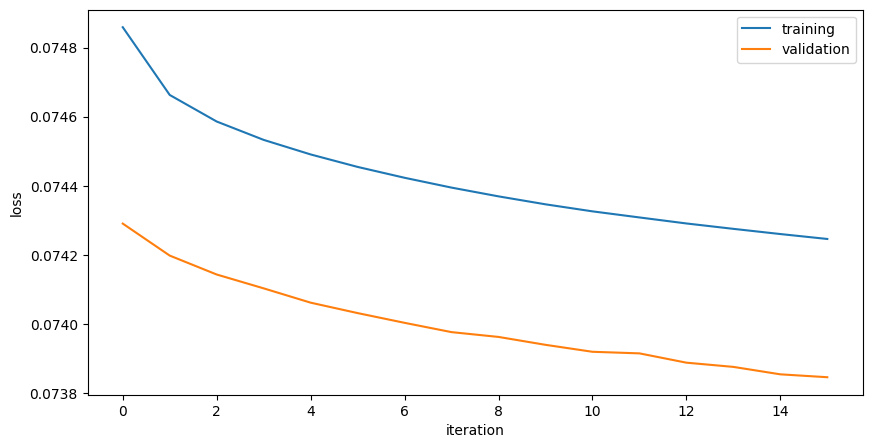

In [ ]:
pl.plot(np.array(history64_bce.history['loss']), label="training")
pl.plot(np.array(history64_bce.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

This loss fuction is also decreasing steeply. Too few epochs!

313/313 [==============================] - 1s 1ms/step


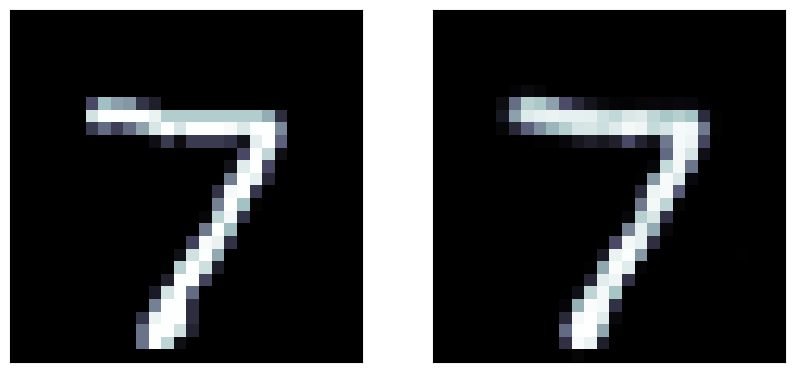

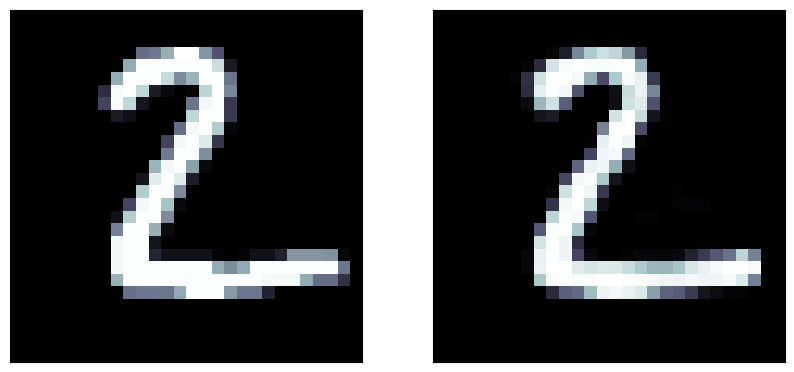

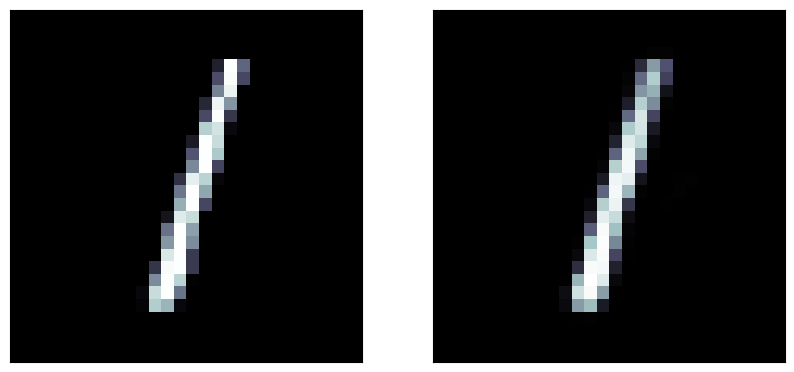

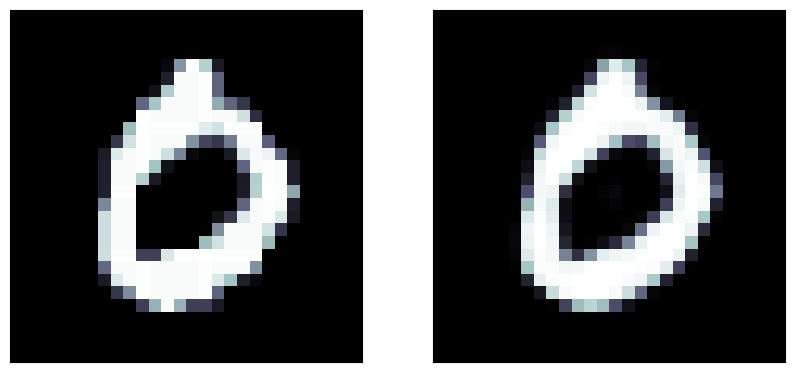

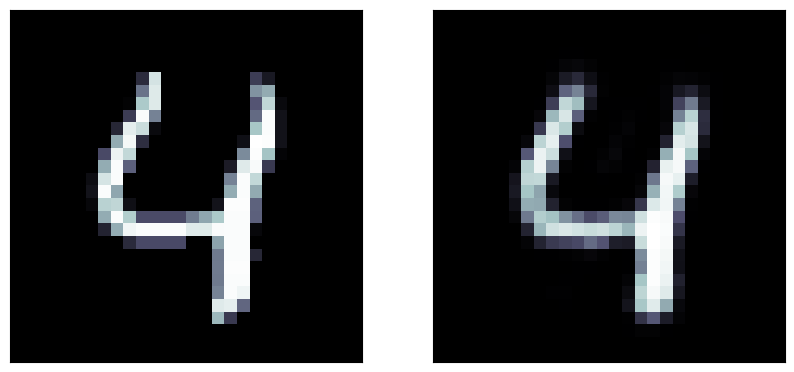

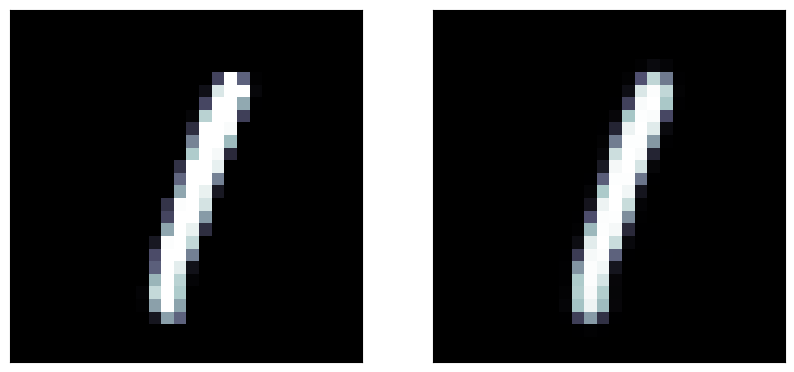

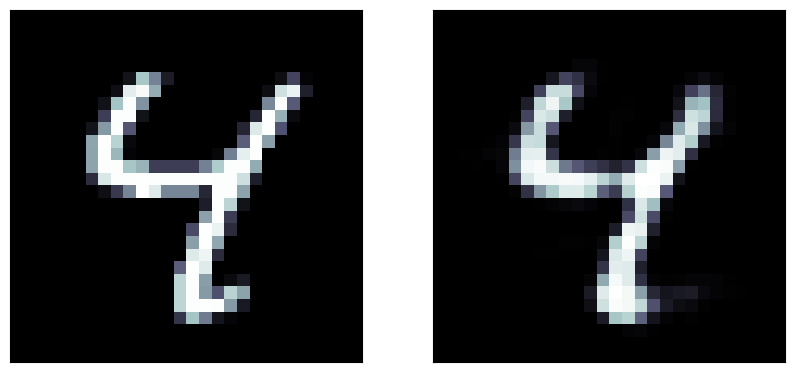

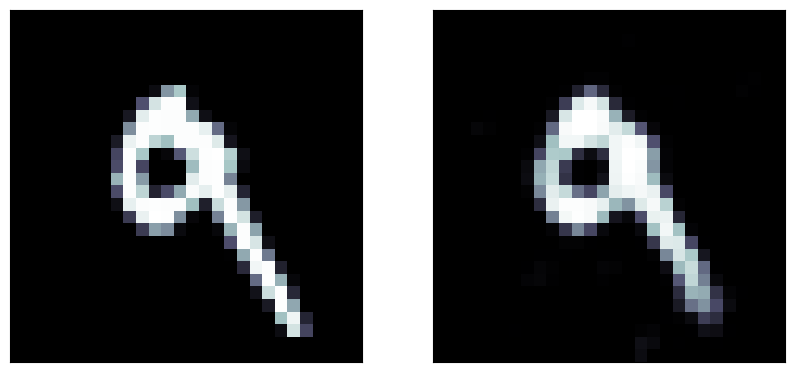

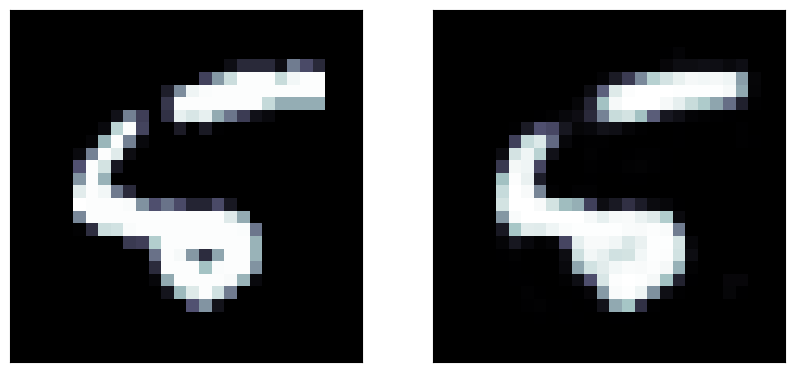

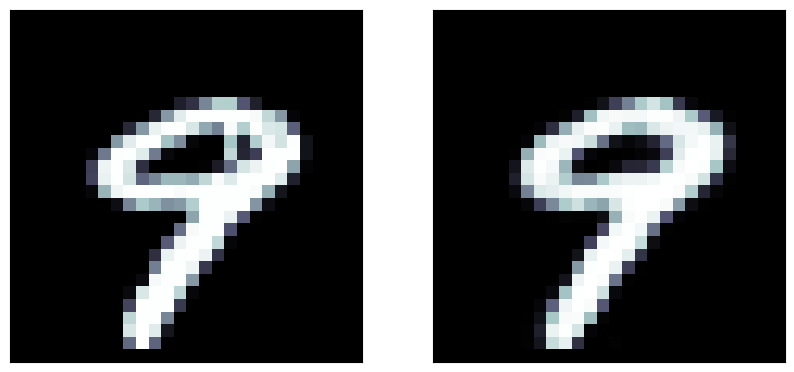

In [ ]:
output_image64_bce =  v.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

This is a pretty good result!

# try more compression

Now we shrink the bottle neck to 16 neurons: a much more ambitions model!

In [ ]:
model_digits16 = Sequential()
#encoder
model_digits16.add(Dense(128, activation='relu', input_dim=xshape))
model_digits16.add(Dense(64, activation='relu'))
model_digits16.add(Dense(32, activation='relu'))
#bottle neck
model_digits16.add(Dense(16, activation='relu'))
#decoder
model_digits16.add(Dense(32, activation='relu'))
model_digits16.add(Dense(64, activation='relu'))
model_digits16.add(Dense(128, activation='relu'))
model_digits16.add(Dense(xshape, activation='sigmoid'))


In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.1)
model_digits16.compile(optimizer=opt, loss="binary_crossentropy")

In [ ]:
print(model_digits16.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dense_19 (Dense)            (None, 128)              

In [ ]:
history16_bce = model_digits16.fit(x_train, x_train, 
                           validation_data=(x_test, x_test),
                           epochs=200, batch_size=100, 
                           verbose=1)


Epoch 1/200
600/600 [==============================] - 5s 4ms/step - loss: 0.5823 - val_loss: 0.2752
Epoch 2/200
600/600 [==============================] - 3s 5ms/step - loss: 0.2682 - val_loss: 0.2644
Epoch 3/200
600/600 [==============================] - 2s 4ms/step - loss: 0.2624 - val_loss: 0.2601
Epoch 4/200
600/600 [==============================] - 2s 4ms/step - loss: 0.2586 - val_loss: 0.2566
Epoch 5/200
600/600 [==============================] - 3s 4ms/step - loss: 0.2556 - val_loss: 0.2540
Epoch 6/200
600/600 [==============================] - 3s 4ms/step - loss: 0.2535 - val_loss: 0.2525
Epoch 7/200
600/600 [==============================] - 3s 5ms/step - loss: 0.2522 - val_loss: 0.2515
Epoch 8/200
600/600 [==============================] - 2s 4ms/step - loss: 0.2514 - val_loss: 0.2509
Epoch 9/200
600/600 [==============================] - 3s 4ms/step - loss: 0.2509 - val_loss: 0.2503
Epoch 10/200
600/600 [==============================] - 3s 5ms/step - loss: 0.2504 - val_lo

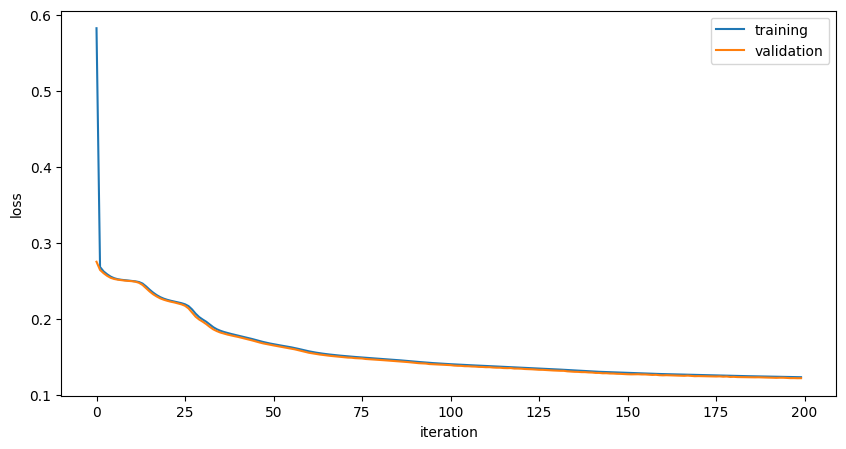

In [ ]:
pl.plot(np.array(history16_bce.history['loss']), label="training")
pl.plot(np.array(history16_bce.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

In [ ]:
history16_bce = model_digits16.fit(x_train, x_train, 
                           validation_data=(x_test, x_test),
                           epochs=2000, batch_size=100, 
                           verbose=1, callbacks=[callback])


Epoch 1/2000
600/600 [==============================] - 3s 4ms/step - loss: 0.1232 - val_loss: 0.1218
Epoch 2/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.1231 - val_loss: 0.1220
Epoch 3/2000
600/600 [==============================] - 2s 4ms/step - loss: 0.1230 - val_loss: 0.1217
Epoch 4/2000
600/600 [==============================] - 2s 4ms/step - loss: 0.1229 - val_loss: 0.1218
Epoch 5/2000
600/600 [==============================] - 2s 4ms/step - loss: 0.1228 - val_loss: 0.1217
Epoch 6/2000
600/600 [==============================] - 2s 4ms/step - loss: 0.1227 - val_loss: 0.1215
Epoch 7/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.1226 - val_loss: 0.1216
Epoch 8/2000
600/600 [==============================] - 2s 4ms/step - loss: 0.1226 - val_loss: 0.1212
Epoch 9/2000
600/600 [==============================] - 3s 4ms/step - loss: 0.1225 - val_loss: 0.1211
Epoch 10/2000
600/600 [==============================] - 3s 4ms/step - loss: 0.122

the loss fuction: once again it did not finish learning. 

313/313 [==============================] - 1s 2ms/step


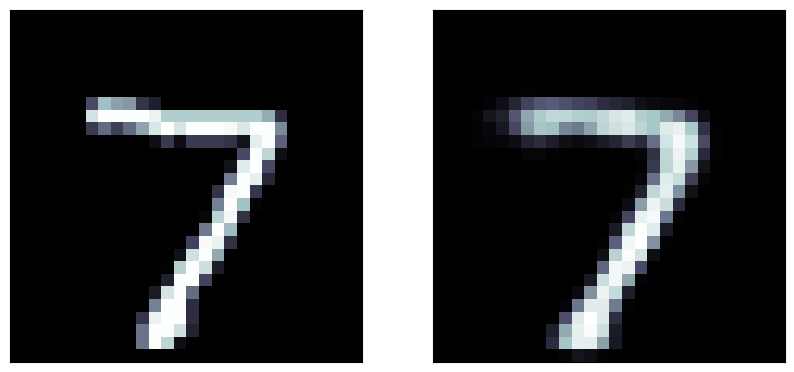

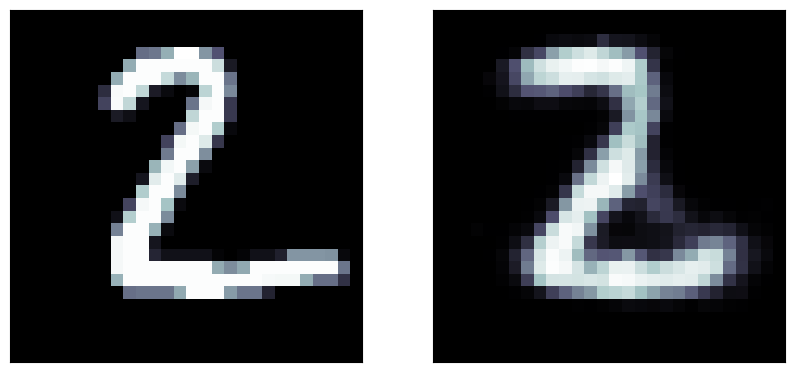

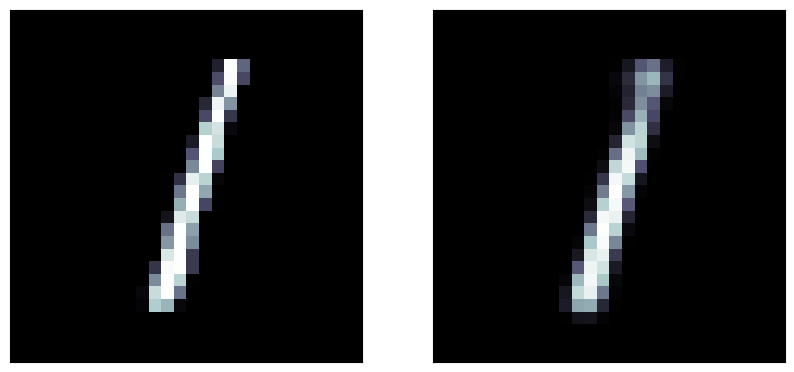

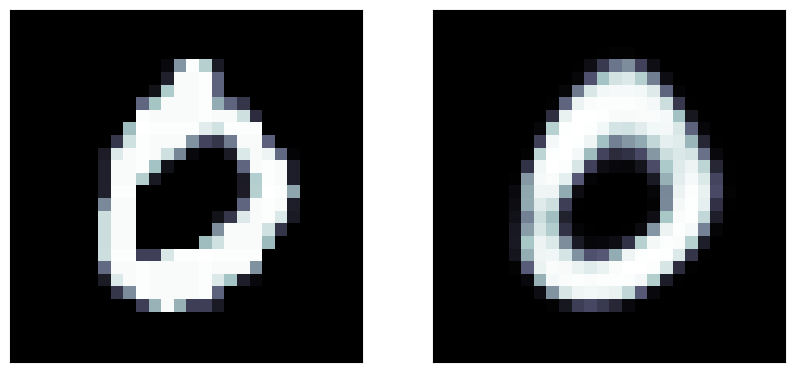

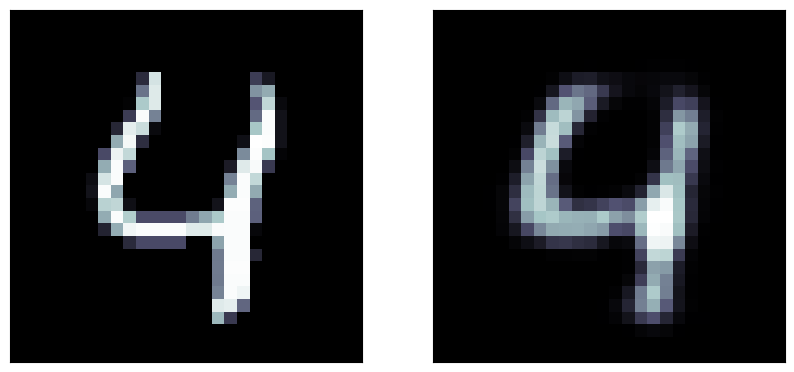

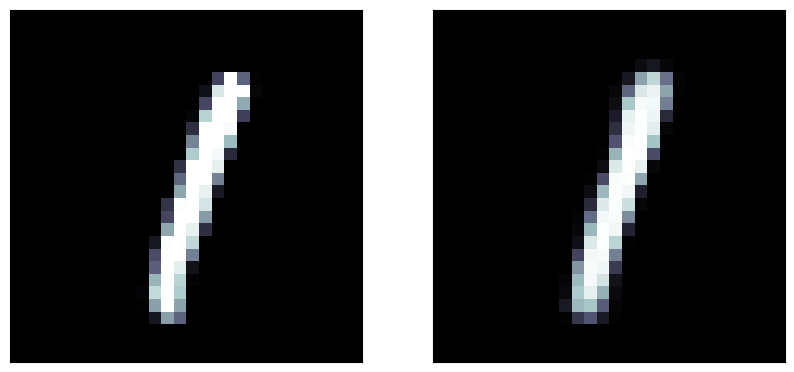

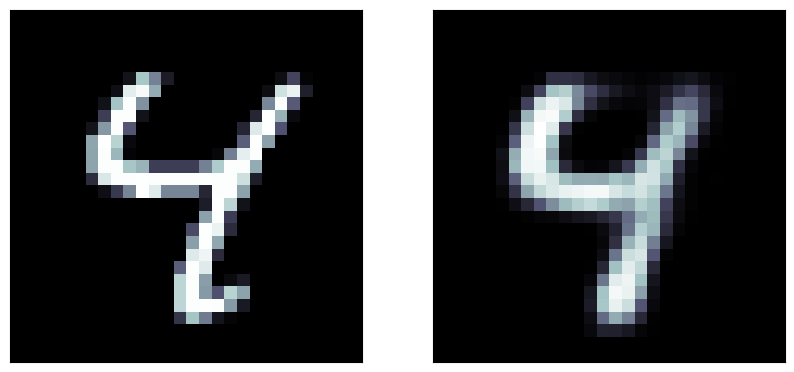

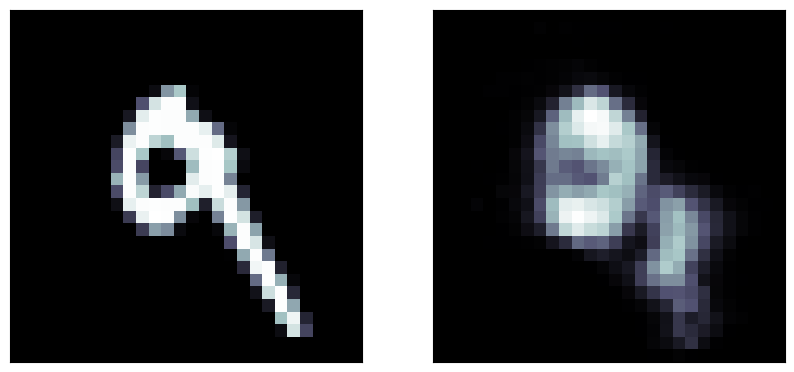

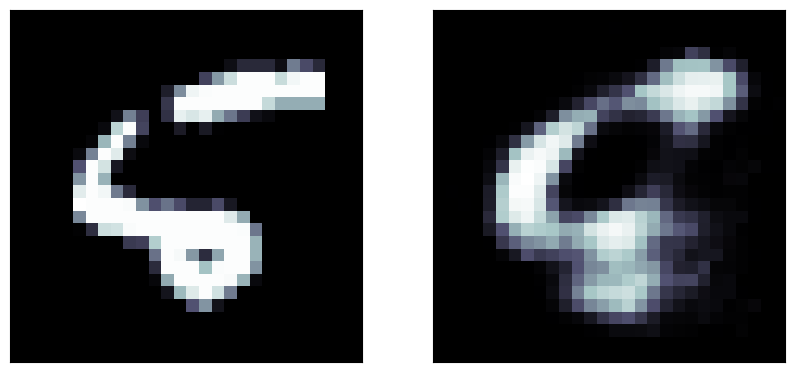

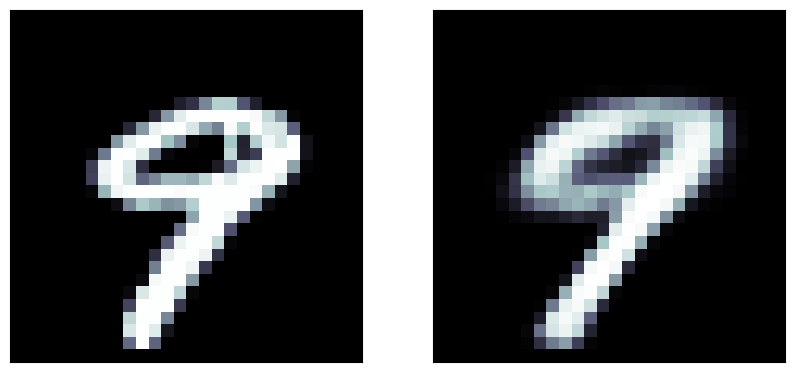

In [ ]:
output_image = model_digits16.predict(x_test)

for i in range(10):
  compareinout(i, output_image, x_test)

The result is not bad! The decoder can recreate the image from only 16 numbers!

# Extract feature

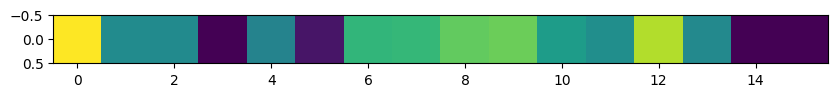

In [ ]:
from keras import backend as K
# input placeholder
inp = model_digits16.input                   
# extract the bottle neck outputs
outputs = model_digits16.layers[3].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(x_test[:1])
pl.imshow(layer_outs[0]);

This is the reducted representation of the first image in the test sample: a 16-values representation of the NxN pixel image

In [ ]:
def compareinout_encoded(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132)
  pl.imshow(functors(testimg[i:i+1])[0])
  pl.yticks([])
  ax = fig.add_subplot(133) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


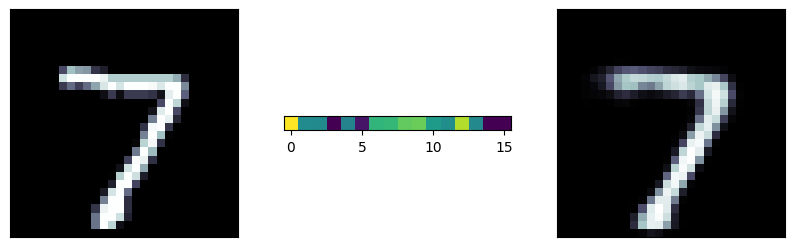

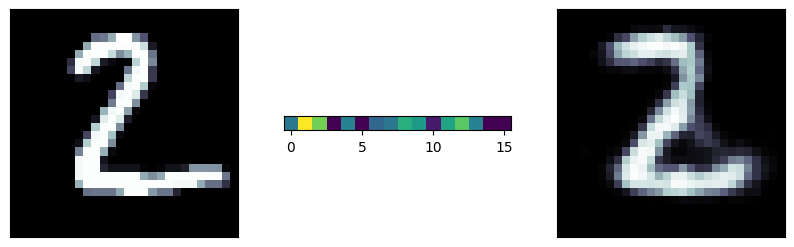

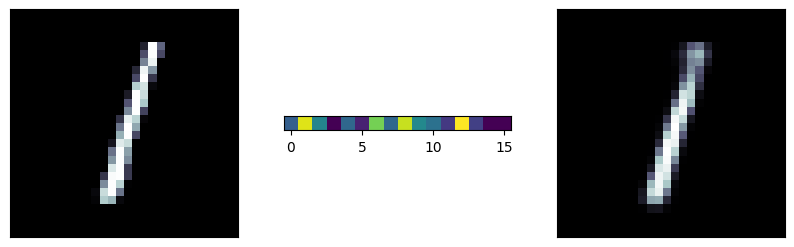

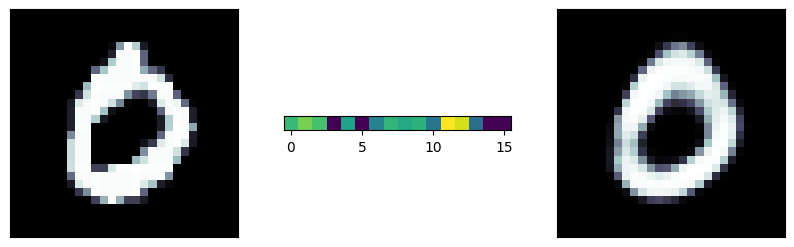

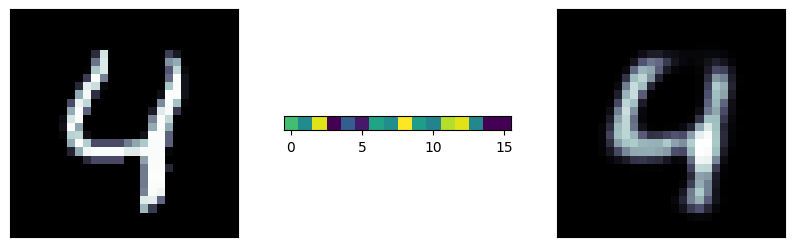

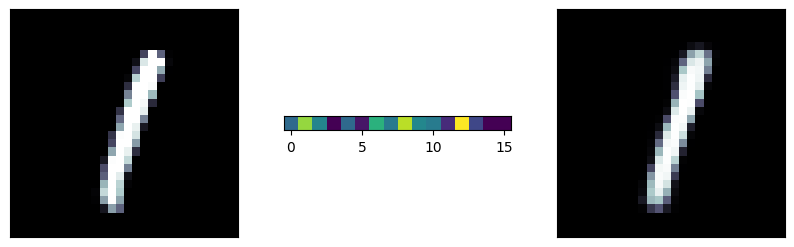

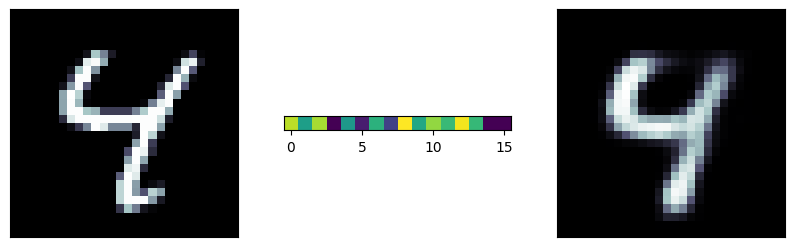

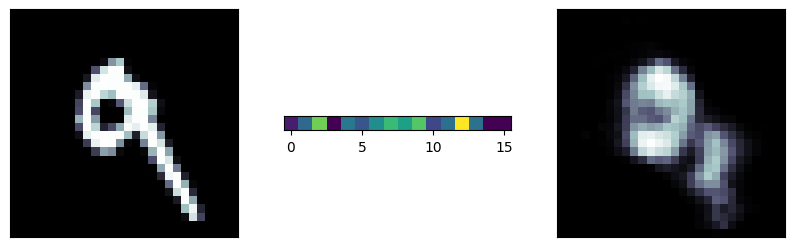

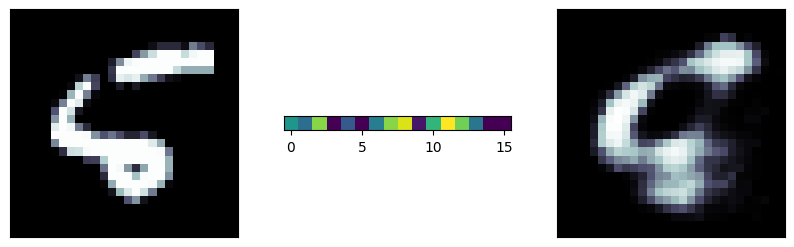

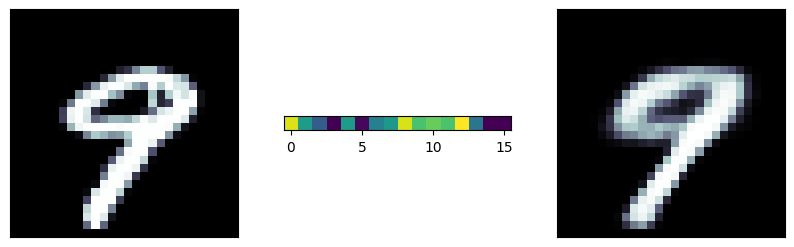

In [ ]:
for i in range(10):
  compareinout_encoded(i, output_image, x_test)



left: original image

center: compressed representation

right: predicted image

# None of these models overfit. lets overfit them on purpose

In [ ]:

history16_overfit = model_digits16.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=400, batch_size=100, verbose=1)

Epoch 1/400
600/600 [==============================] - 3s 5ms/step - loss: 0.1159 - val_loss: 0.1151
Epoch 2/400
600/600 [==============================] - 3s 4ms/step - loss: 0.1159 - val_loss: 0.1150
Epoch 3/400
600/600 [==============================] - 3s 4ms/step - loss: 0.1158 - val_loss: 0.1148
Epoch 4/400
600/600 [==============================] - 3s 4ms/step - loss: 0.1158 - val_loss: 0.1148
Epoch 5/400
600/600 [==============================] - 3s 4ms/step - loss: 0.1158 - val_loss: 0.1147
Epoch 6/400
600/600 [==============================] - 3s 5ms/step - loss: 0.1157 - val_loss: 0.1145
Epoch 7/400
600/600 [==============================] - 2s 4ms/step - loss: 0.1156 - val_loss: 0.1145
Epoch 8/400
600/600 [==============================] - 2s 4ms/step - loss: 0.1156 - val_loss: 0.1144
Epoch 9/400
600/600 [==============================] - 3s 4ms/step - loss: 0.1155 - val_loss: 0.1145
Epoch 10/400
600/600 [==============================] - 3s 5ms/step - loss: 0.1155 - val_lo

313/313 [==============================] - 0s 2ms/step


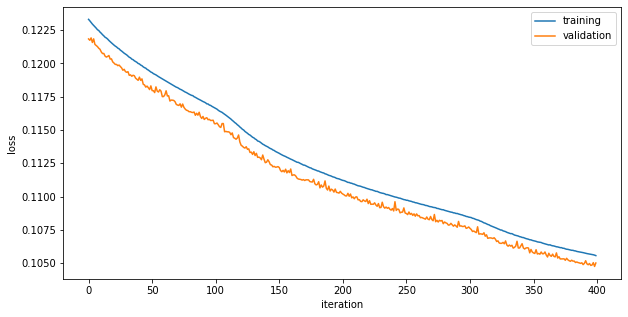

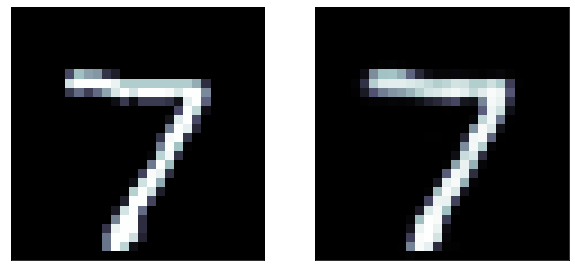

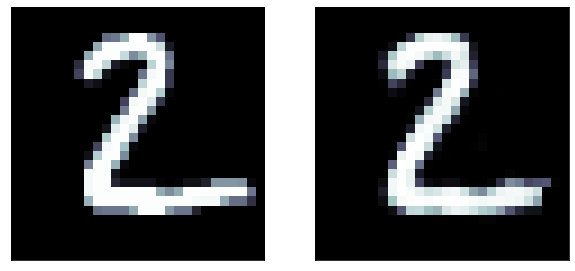

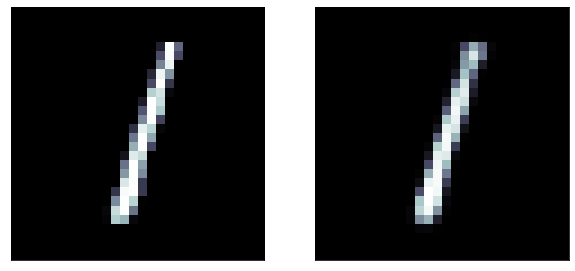

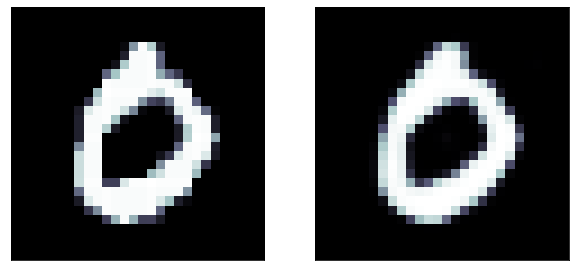

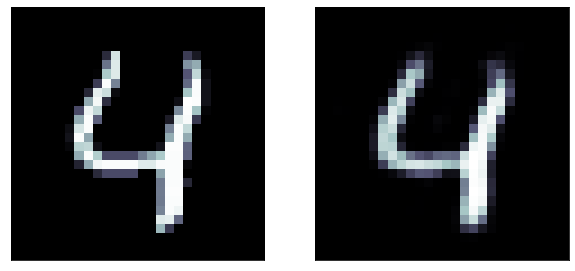

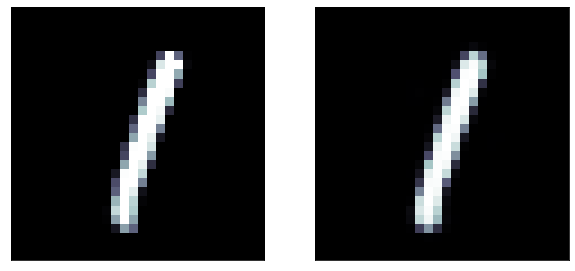

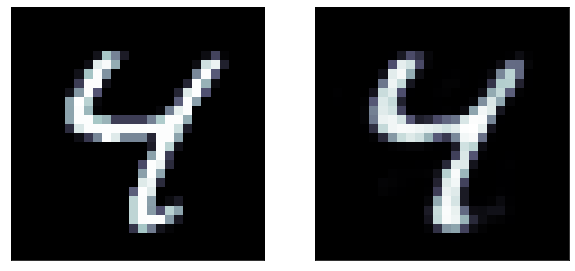

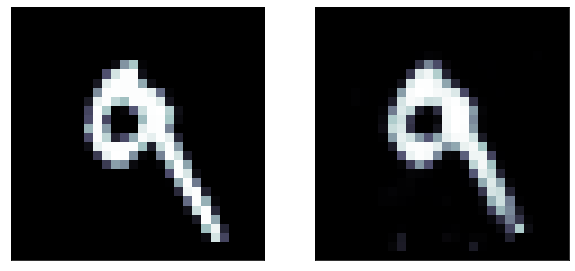

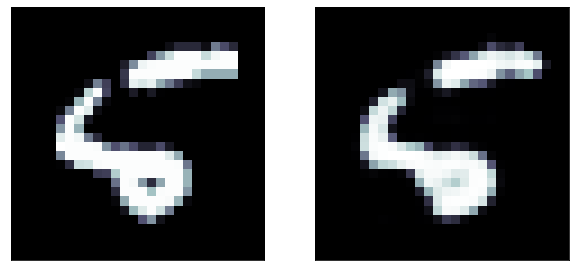

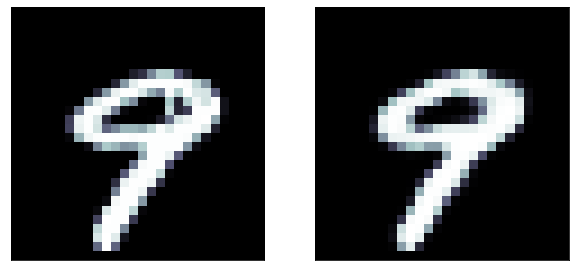

In [ ]:
pl.plot(np.array(history16_overfit.history['loss']), label="training")
pl.plot(np.array(history16_overfit.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

output_image16_bce = model_digits16_bce.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

The loss function still decreases by the validation loss function is flat or increases: sign of overfitting - we are learning non-generalizable properties of the training set